In [1]:
# from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere

import numpy as np
from numpy import pi

In [2]:
from qiskit import transpile
from qiskit.providers.basic_provider import BasicSimulator

from qiskit.quantum_info import Pauli
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import Operator, Statevector, DensityMatrix

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import EstimatorOptions

from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Estimator

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

from qiskit.quantum_info import state_fidelity

# import matplotlib.pyplot as plt

In [3]:
# Descomente la siguiente linea si desea ver las imágenes más grandes.
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [4]:
sim_backend = BasicSimulator()

In [5]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

In [6]:
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.rx(pi / 5, qreg_q[0])
circuit.ry(pi / 3, qreg_q[1])
circuit.ry(pi / 5, qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

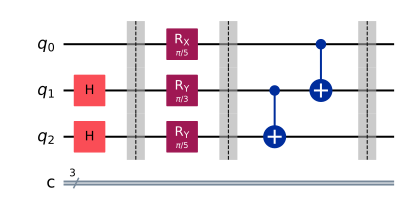

In [7]:
circuit.draw('mpl')
# circuit.draw('mpl', style='iqx', filename='Circuit1.png')

In [8]:
unitary = Operator(circuit)

from qiskit.visualization import array_to_latex
array_to_latex(unitary, precision=3, prefix="\\text{Circuito = }\n")


<IPython.core.display.Latex object>

In [9]:
final_state = Statevector(circuit)

# Print the statevector neatly:
array_to_latex(final_state, precision=5, prefix="\\text{EstadoFinal = }")

<IPython.core.display.Latex object>

In [10]:
circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])

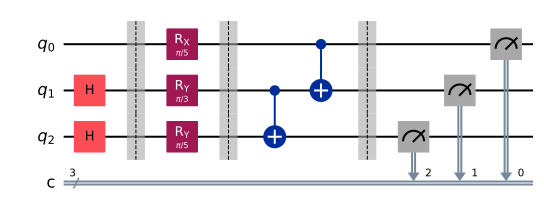

In [11]:
circuit.draw('mpl')
# circuit.draw('mpl', style='iqx', filename='Circuit1.png')

In [12]:
job = sim_backend.run(transpile(circuit, sim_backend), shots=1024)
result = job.result()

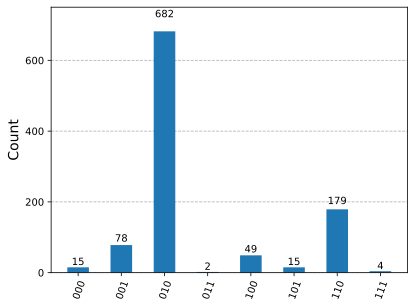

In [13]:
plot_histogram(result.get_counts())

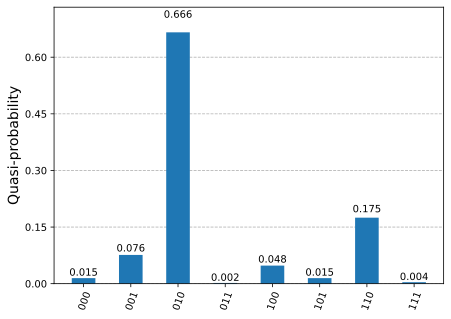

In [14]:
plot_distribution(result.get_counts())
# plot_distribution(result.get_counts(), filename='Circuit1_prob.png')

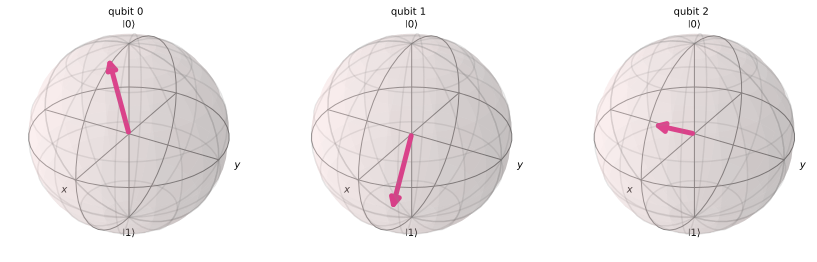

In [15]:
plot_bloch_multivector(final_state)

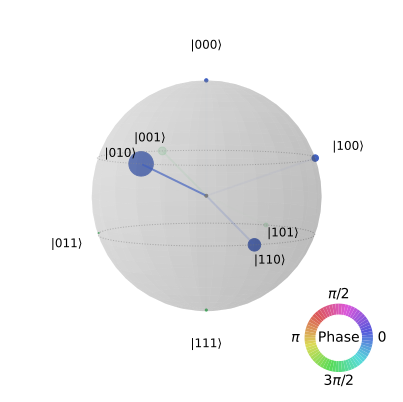

In [16]:
plot_state_qsphere(final_state)

In [17]:
# import qiskit.tools.jupyter
# %qiskit_version_table

import qiskit
qiskit.__version__

'1.3.2'